In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [5]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


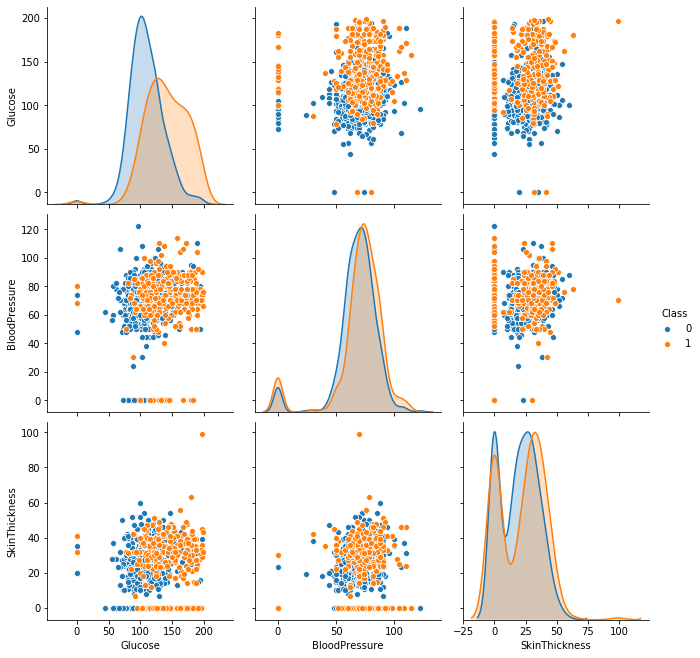

In [9]:
#PairPlot to choose right algorithm
sb.pairplot(data=df[['Glucose' ,'BloodPressure','SkinThickness', 'Class']], hue='Class', dropna=True, height=3)

From the plot, we can see that there is a lot of overlap between the data points.KNN should be preferred as it works on the principle of Euclidean distance. In case KNN is not performing as per the expectation then we can use the Decision Tree or Random Forest algorithm.

A decision tree or Random Forest works on the principle of non-linear classification. We can use it if some of the data points are overlapping with each other.

In [11]:
#Import Sklearn Libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [13]:
#Store independent and dependent variable
feature = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature] # Features
y = df["Class"]

In [14]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Decision Tree

In [15]:
# Create Decision Tree classifier object
import time
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
start = time.time()
clf = clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.0069925785064697266s


### Logistic Regression

In [16]:
#Import sklearn library
from sklearn.linear_model import LogisticRegression
import time
clf = LogisticRegression(random_state = 0) 
start = time.time()
clf.fit(X_train,y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.05240821838378906s


### Random Forest 

In [17]:
#Create a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
start = time.time()
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.3731575012207031s


From the above results, we can conclude that Decision Trees will take much less time than all algorithms for small dataset. Hence, it is recommended to use a low bias/high variance classifier like a decision tree.